# Bike Rental Analysis

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Objective:

Predict the potential independent variables that can be used as significant predictable variables.

## import libraries

In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read data from the file
data=pd.read_csv('day.csv')

In [5]:
#basic checkups
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
data.shape

(730, 16)

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#checking for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(730, 16)

as after performing dropping duplicate variable operation, we can see same count of values in data.shape, means there is no duplicate values found

## dropping the unwanted columns

In [12]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered are just count of casual and registered users, so we can drop those columns.
data.drop(['instant','dteday'],axis=1, inplace=True)
data.drop(['casual','registered'],axis=1,inplace=True)


## Mapping the numerical columns to categorical as per business requirement.


In [13]:
data.season = data.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [14]:
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
data.mnth = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
data.weathersit = data.weathersit.map({1:'clear',2:'Misty',3:'snowrain',4:'heavyrain'})

In [17]:
data.shape

(730, 12)

In [18]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualisation part

In [19]:
# function to create barplot related to categorical columns

def plot_categoricals(column):

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=data)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=data, hue='yr', palette='Set1')
    
    plt.legend(labels=['2018', '2019'])
    plt.show()

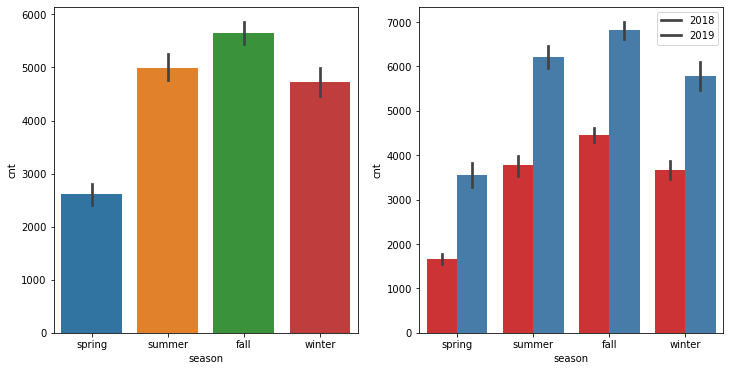

In [20]:
plot_categoricals('season')

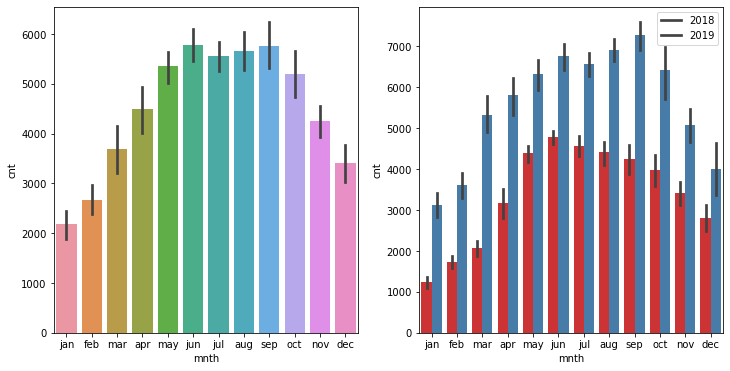

In [21]:
plot_categoricals('mnth')

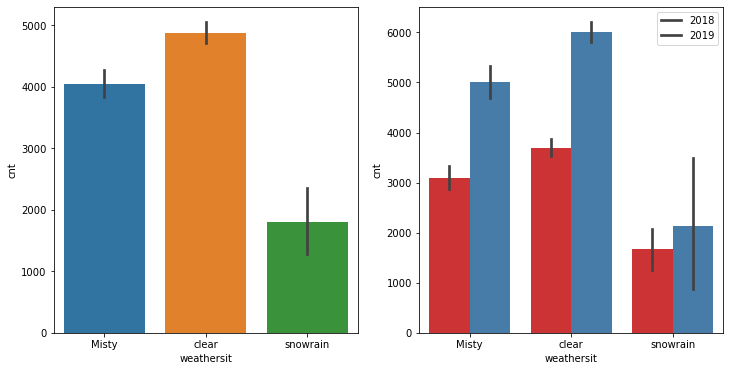

In [22]:
plot_categoricals('weathersit')

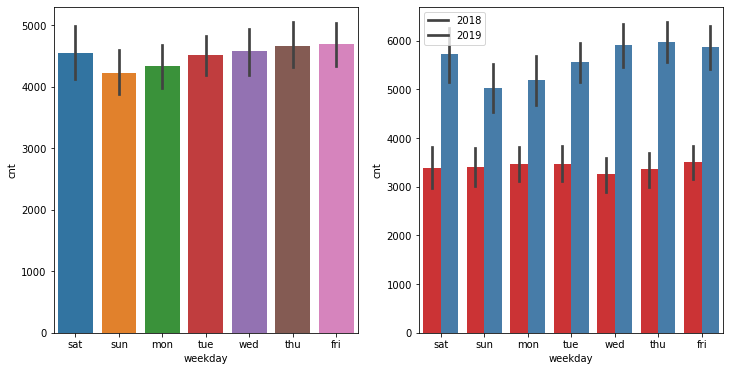

In [23]:
plot_categoricals('weekday')

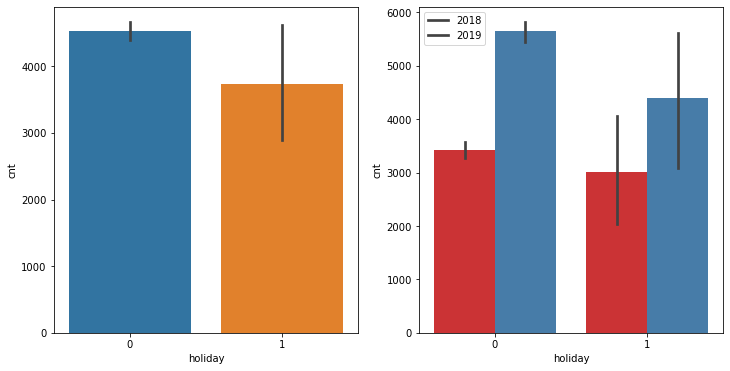

In [24]:
plot_categoricals('holiday')

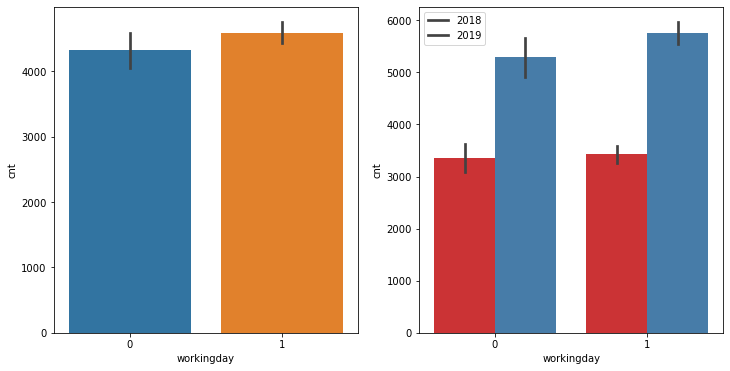

In [25]:
plot_categoricals('workingday')

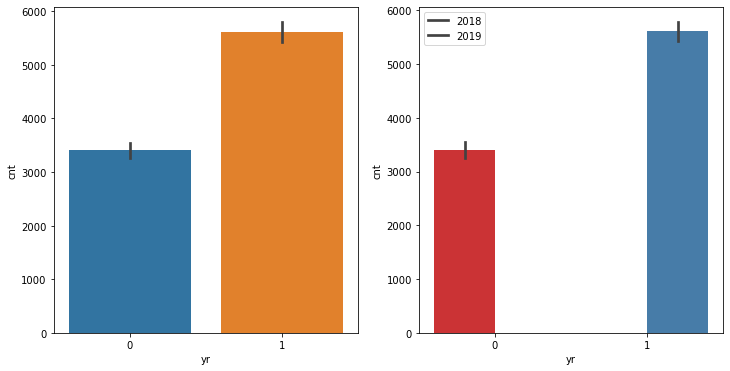

In [26]:
plot_categoricals('yr')

1. Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.
2. Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.
3. Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.
4. Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
5. When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
6. Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.
7. 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

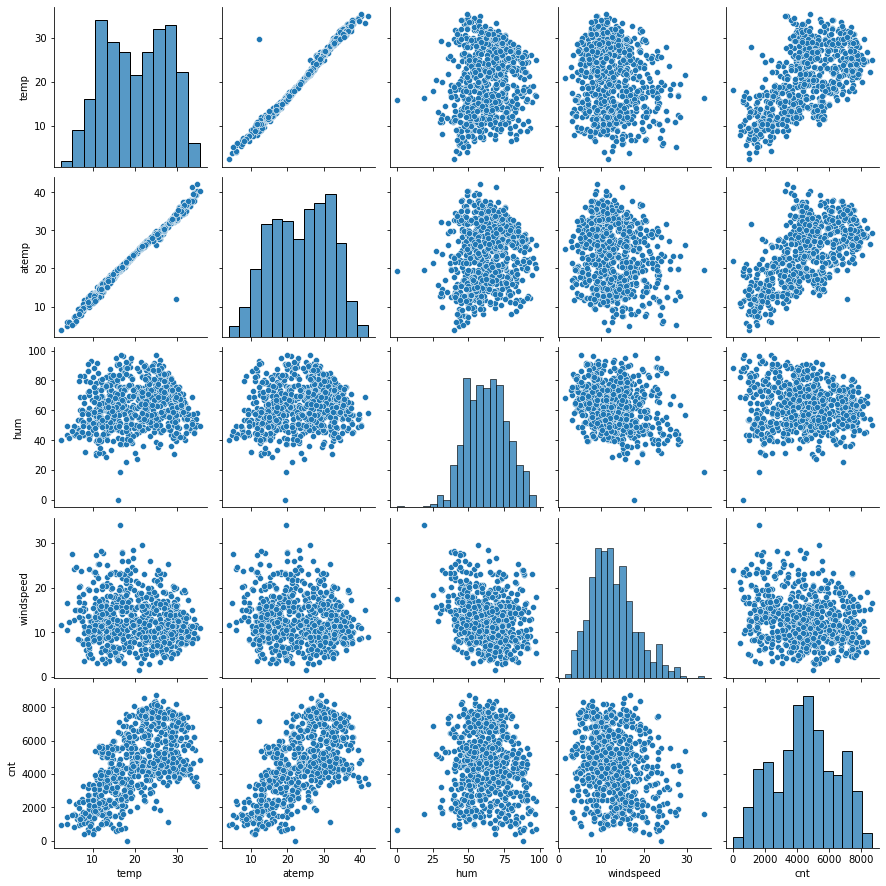

In [27]:
#barplot related to categorical columns

sns.pairplot(data=data, vars=['temp','atemp','hum','windspeed','cnt'])

Most of the variables have positive variance and correlation

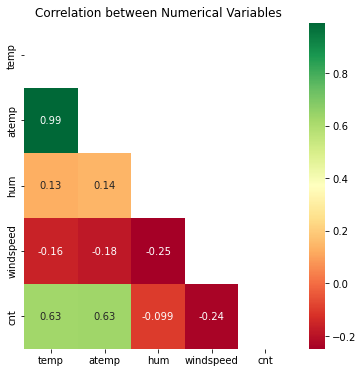

In [28]:
# Checking the correlation between the numerical variables

plt.figure(figsize=(6, 6))
corr_matrix = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", mask=mask)
plt.title("Correlation between Numerical Variables")
plt.show()


There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Data Preparation

In [29]:
# Dummy variable creation for month, weekday, weathersit and season variables.
#drop_first removes any redundant variable


months_df=pd.get_dummies(data.mnth,drop_first=True)
weekdays_df=pd.get_dummies(data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(data.season,drop_first=True)

In [30]:
data.shape

(730, 12)

In [31]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
# Merging  the dataframe, with the dummy variable dataset.

data_new = pd.concat([data, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [33]:
data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,0,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [34]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  jul         730 non-null    uint8  
 17  jun         730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [35]:
#dropping categorical columns as we already created dummy variable.

data_new.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)

In [36]:
data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,1,0,0


In [37]:
data_new.shape

(730, 30)

## Model Building

In [38]:
# splitting the dataframe into train and test

In [39]:
df_train, df_test = train_test_split(data_new, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
df_train.shape

(510, 30)

In [41]:
df_test.shape

(219, 30)

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,1,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,0,0,1,0


In [43]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,1,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,1,0,0,1,0


In [44]:
# apply scaler() to all columns except the 'yes-no' and 'dummy' variables

num_vars=['temp','atemp','hum','windspeed','cnt']

In [45]:
# use MinMaxScalar to rescale the features

scalar = MinMaxScaler()

df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [46]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,0,0,1,0


In [47]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


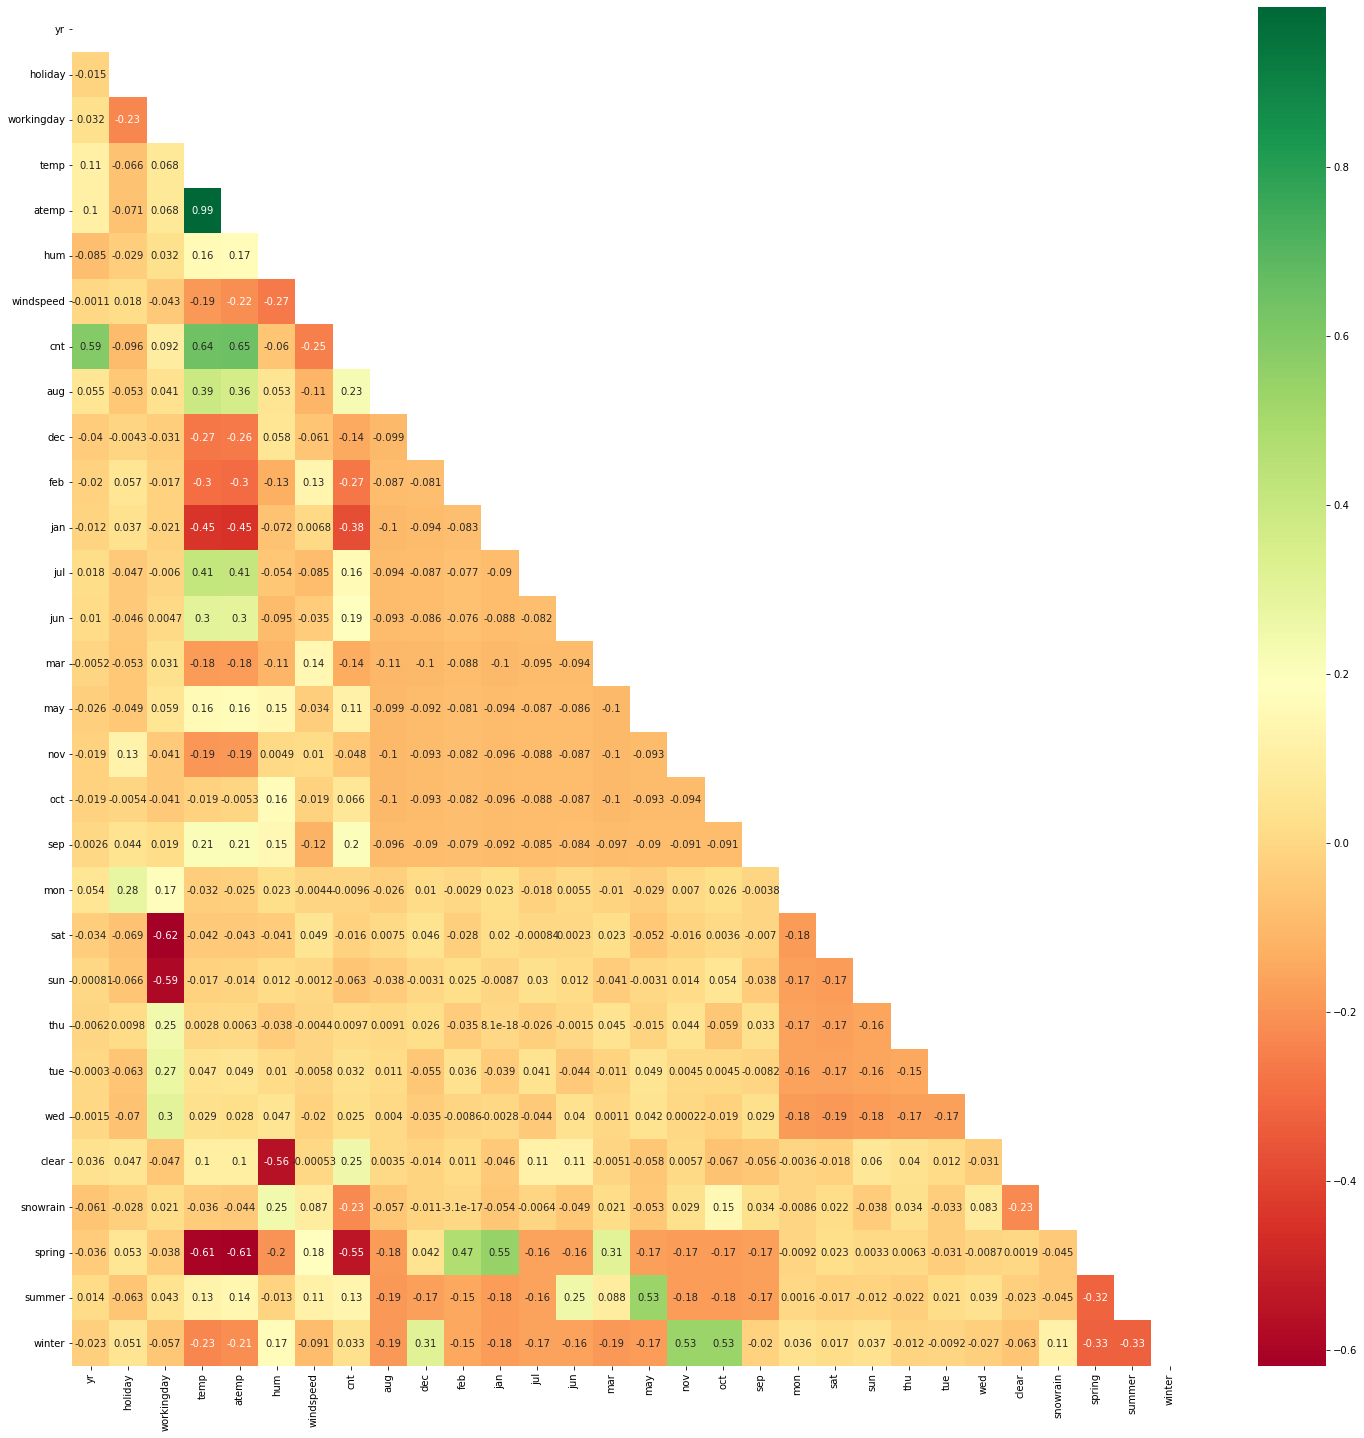

In [48]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

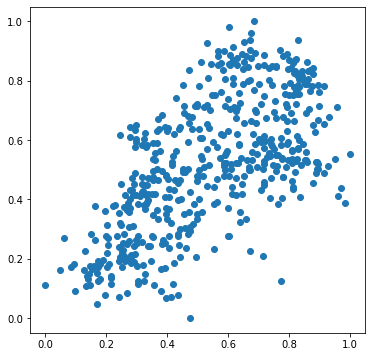

In [49]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [50]:
# Building Linear model

y_train = df_train.pop('cnt')

In [51]:
x_train = df_train

In [52]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)

In [53]:
#list of variables selected in top 15 list

list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('clear', True, 1),
 ('snowrain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [54]:
# selecting the variables for RFE in col list

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'jul',
       'sep', 'sat', 'clear', 'snowrain', 'spring', 'summer', 'winter'],
      dtype='object')

In [55]:
x_train_rfe = x_train[col]

In [56]:
#Variance inflation factor

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif


In [57]:
calculateVIF(x_train_rfe)

,Features,VIF
0,hum,24.60
1,temp,20.45
2,workingday,5.32
3,spring,5.06
4,windspeed,4.71
5,winter,3.84
6,clear,3.47
7,summer,2.98
8,yr,2.09
9,sat,1.98


it is clearly observing that humidity showing high VIF, so its clearly not significant variable

## Building a linear model

In [58]:
# Building 1st linear regression model

x_train_lm_1 = sm.add_constant(x_train_rfe)


lr_1 = sm.OLS(y_train,x_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          2.31e-191
Time:                        19:19:41   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1932      0.040      4.874      0.0

In [59]:
# As humidity shows high VIF values hence we can drop it
x_train_new = x_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
0,temp,7.83
1,workingday,5.19
2,windspeed,4.70
3,spring,3.18
4,clear,2.86
5,summer,2.31
6,yr,2.08
7,winter,2.00
8,sat,1.96
9,jan,1.61


In [60]:
# Building 2st linear regression model

x_train_lm_2 = sm.add_constant(x_train_new)


lr_2 = sm.OLS(y_train,x_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          7.33e-189
Time:                        19:19:41   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0910      0.032      2.886      0.0

In [63]:
# As temperature shows high VIF values hence we can drop it
x_train_new = x_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
0,windspeed,4.39
1,workingday,3.86
2,spring,3.01
3,clear,2.56
4,summer,2.27
5,winter,1.99
6,yr,1.94
7,sat,1.70
8,jan,1.59
9,jul,1.36


In [64]:
# Building 3rd linear regression model

x_train_lm_3 = sm.add_constant(x_train_new)


lr_3 = sm.OLS(y_train,x_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.04e-154
Time:                        19:21:49   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4552      0.021     21.464      0.0

In [65]:
# As july shows high P values hence we can drop it
x_train_new = x_train_new.drop(['jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
0,windspeed,4.30
1,workingday,3.67
2,spring,2.68
3,clear,2.43
4,summer,1.97
5,yr,1.92
6,winter,1.75
7,sat,1.65
8,jan,1.59
9,sep,1.19


In [66]:
# Building 4th linear regression model

x_train_lm_4 = sm.add_constant(x_train_new)


lr_4 = sm.OLS(y_train,x_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          3.62e-155
Time:                        19:25:46   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4516      0.020     22.871      0.0

In [67]:
# As holiday shows high P values hence we can drop it
x_train_new = x_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
0,windspeed,4.25
1,workingday,3.37
2,spring,2.65
3,clear,2.40
4,summer,1.95
5,yr,1.92
6,winter,1.71
7,jan,1.59
8,sat,1.57
9,sep,1.17


In [68]:
# Building 5th linear regression model

x_train_lm_5 = sm.add_constant(x_train_new)


lr_5 = sm.OLS(y_train,x_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.30e-155
Time:                        19:28:29   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4446      0.019     22.943      0.0

We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 160 (which is greater than 1) and the p-value of 1.30e-155 i.e almost equals to zero, states that the overall model is significant

In [69]:
lr_5.params

const         0.444594
yr            0.247992
workingday    0.056660
windspeed    -0.188736
jan          -0.103085
sep           0.071353
sat           0.065027
clear         0.088820
snowrain     -0.214573
spring       -0.258069
summer       -0.040579
winter       -0.072862
dtype: float64

## Resudial Analysis of train data and validation

In [70]:
x_train_lm_5

,const,yr,workingday,windspeed,jan,sep,sat,clear,snowrain,spring,summer,winter
653,1.0,1,1,0.300794,0,0,0,1,0,0,0,1
576,1.0,1,1,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.255342,0,0,1,0,0,1,0,0
728,1.0,1,0,0.663106,0,0,0,1,0,1,0,0
482,1.0,1,0,0.188475,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.355596,0,0,0,0,0,0,1,0
578,1.0,1,1,0.187140,0,0,0,1,0,0,0,0
53,1.0,0,1,0.111379,0,0,0,1,0,1,0,0
350,1.0,0,0,0.431816,0,0,1,0,0,0,0,1


In [72]:
y_train_pred = lr_5.predict(x_train_lm_5)

<AxesSubplot:ylabel='Density'>

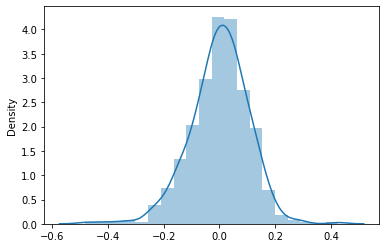

In [73]:
# Normality of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)

error terms are following normal disturbution

## See for multicollinearity

In [74]:
calculateVIF(x_train_new)

,Features,VIF
0,windspeed,4.25
1,workingday,3.37
2,spring,2.65
3,clear,2.40
4,summer,1.95
5,yr,1.92
6,winter,1.71
7,jan,1.59
8,sat,1.57
9,sep,1.17


<AxesSubplot:>

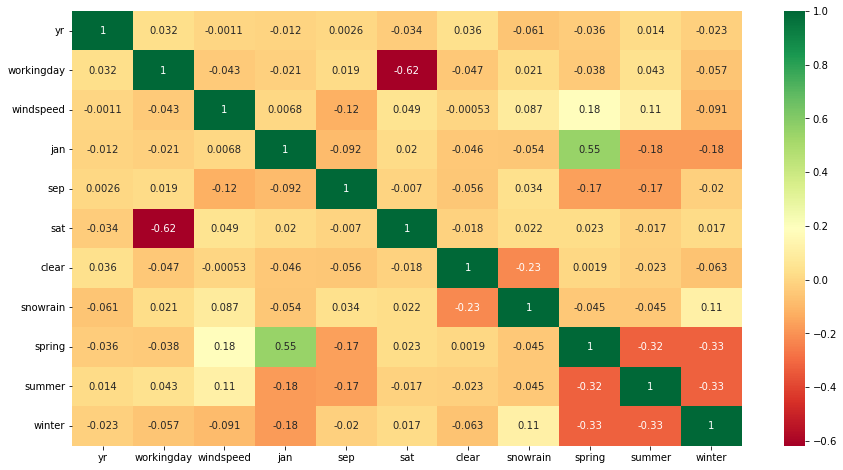

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_new.corr(), annot=True, cmap='RdYlGn')

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

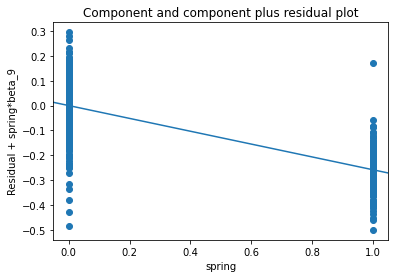

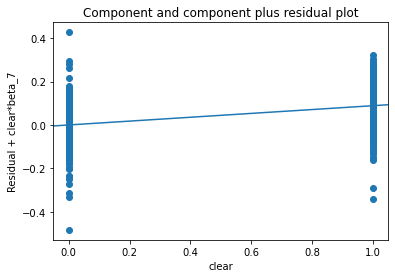

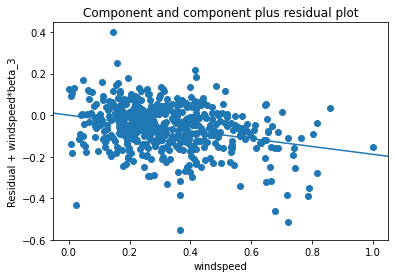

In [77]:
sm.graphics.plot_ccpr(lr_5, 'spring')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'clear')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

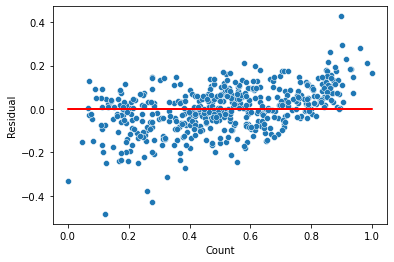

In [80]:
# Resudial linearity ( Homoscedasticity )

y_train_pred = lr_5.predict(x_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

In [83]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scalar.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,1,0,0,1,0


In [84]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,snowrain,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
y_test = df_test.pop('cnt')
x_test = df_test

In [88]:
col1 = x_train_new.columns

x_test = x_test[col1]

# Adding constant variable to test dataframe
x_test_lm_5 = sm.add_constant(x_test)

In [90]:
y_pred = lr_5.predict(x_test_lm_5)

In [91]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7409

## Model Evaluation

Text(0.5, 0.98, 'y_test vs y_pred')

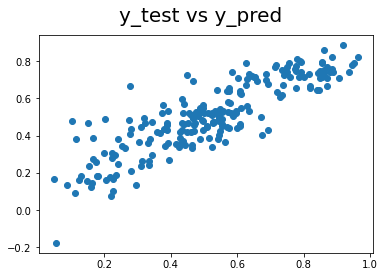

In [92]:
# Let's now plot the graph for actual versus predicted values.

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 

In [93]:
round(lr_5.params, 4)

const         0.4446
yr            0.2480
workingday    0.0567
windspeed    -0.1887
jan          -0.1031
sep           0.0714
sat           0.0650
clear         0.0888
snowrain     -0.2146
spring       -0.2581
summer       -0.0406
winter       -0.0729
dtype: float64

cnt = 0.4446 + 0.2480 * yr + 0.0567 * workingday - 0.1887 * windspeed - 0.1031 * jan + 0.0714 * sep + 0.0650 * clear - 0.2146 * snowrain - 0.2581 * summer - 0.0729 * winter

In [94]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7272


Text(0.5, 1.0, 'y_test vs y_pred')

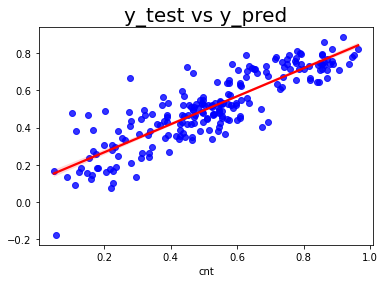

In [95]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)

## Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.779
- Test dataset R^2           : 0.7409
- Train dataset Adjusted R^2 : 0.775    
- Test dataset Adjusted R^2  : 0.7272

Significant variables that we can predict from linear regression are:
    
year, workingday, windspeed, january, september, saturday, clear, snowrain, spring, summer, winter.